In [1]:
# 4.2 Exercise
# Predicting Fuel Efficiency
## Justin Wisniewski

In [2]:
# Load necessary libraries
import numpy as np
import pandas as pd

In [3]:
# Read in the auto mpg dataset
df=pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
# Remove the car name column
df1 = df.drop(labels=['car name'], axis=1)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
# The horsepower column values likely imported as a string data type. 
# Figure out why and replace any strings with the column mean
df1['horsepower'].unique()
df1.dtypes
df1['horsepower'].isnull().values.any()
df1[df1['horsepower']=='?']
df1['horsepower'] = df1['horsepower'].replace('?', '0')
df1['horsepower'] = pd.to_numeric(df1['horsepower'])
df1['horsepower'].dtypes
df1[df1['horsepower']==0]
df1['horsepower'] = df1['horsepower'].replace(0, df1['horsepower'].mean)
df1[df1['horsepower']==0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [7]:
# Create dummy variables for the origin column
df2 = pd.get_dummies(df1['origin'], prefix='origin')
df2
df3 = pd.concat([df1, df2], axis=1, join='inner')
df3
df4 = df3.drop(['origin'], axis=1)
df4

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [8]:
# Create a correlation coefficient matrix
df4.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_1,-0.568192,0.604351,0.651407,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


In [9]:
# There are multiple features with strong correlations to mpg

[]

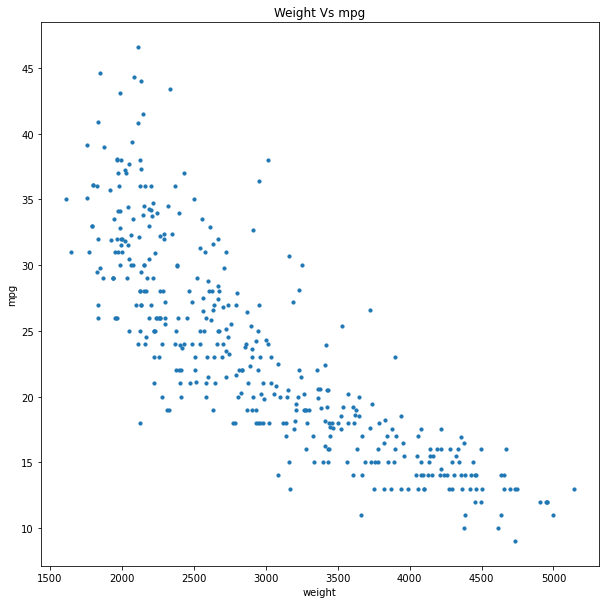

In [10]:
# Plot mpg versus weight
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter( df4['weight'], df4['mpg'], s = 10)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('Weight Vs mpg')
plt.plot()

In [11]:
# This graph shows a strong negative correlation as weight increases mpg decreases

In [12]:
# Randomly split the data into 80% training data and 20% test data, where your target is mpg
from sklearn.model_selection import train_test_split
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=42)
df4_train_mpg = df4_train['mpg']
df4_train = df4_train.drop(['mpg'], axis=1)
df4_test_mpg = df4_train['mpg']
df4_test = df4_train.drop(['mpg'], axis=1)

KeyError: 'mpg'

In [13]:
# Train an ordinary linear regression on the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df4_train, df4_train_mpg)

TypeError: float() argument must be a string or a number, not 'method'

In [14]:
# Calculate R2, RMSE, and MAE on both the training and test sets and interpret your result
import numpy as np
predicted = model.predict(df4_train)
actual = df4_train_mpg
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

TypeError: float() argument must be a string or a number, not 'method'

In [15]:
predicted = model.predict(df4_test)
actual = df4_test_mpg
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

C:\Users\jwiz3\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- mpg
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


TypeError: float() argument must be a string or a number, not 'method'